In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
#importing traindata
income_df = pd.read_csv("/content/Adult_TrainDataset.csv")
income_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#importing test data
test_df = pd.read_csv("/content/Adult_TestDataset.csv")


In [ ]:
income_df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income_df.replace('?' ,np.NaN ,inplace=True)
income_df.replace('? ' ,np.NaN ,inplace=True)
income_df.replace(' ?' ,np.NaN ,inplace=True)

In [ ]:
income_df.isnull().sum()

Age                    0
Work_Class          1836
Final_Weight           0
Education              0
Education-Number       0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital_Gain           0
Capital_Loss           0
Hours-Per-Week         0
Native_Country       583
Income                 0
dtype: int64

In [ ]:
income_df.Age = income_df.Age.astype(float)
income_df['Hours-Per-Week'] = income_df['Hours-Per-Week'].astype(float)

In [ ]:
my_df = income_df.dropna()

In [ ]:
my_df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               30162 non-null  float64
 1   Work_Class        30162 non-null  object 
 2   Final_Weight      30162 non-null  int64  
 3   Education         30162 non-null  object 
 4   Education-Number  30162 non-null  int64  
 5   Marital_Status    30162 non-null  object 
 6   Occupation        30162 non-null  object 
 7   Relationship      30162 non-null  object 
 8   Race              30162 non-null  object 
 9   Sex               30162 non-null  object 
 10  Capital_Gain      30162 non-null  int64  
 11  Capital_Loss      30162 non-null  int64  
 12  Hours-Per-Week    30162 non-null  float64
 13  Native_Country    30162 non-null  object 
 14  Income            30162 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [ ]:
my_df['predclass'] = my_df['Income']
del my_df['Income']


<ipython-input-13-9fdaa036530b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['predclass'] = my_df['Income']


In [ ]:
print('Work_class',my_df.Work_Class.unique())
print('Education',my_df.Education.unique())
print('Marital_Status',my_df['Marital_Status'].unique())
print('Occupation',my_df.Occupation.unique())
print('Relationship',my_df.Relationship.unique())
print('Race',my_df.Race.unique())
print('Sex',my_df.Sex.unique())
print('Native_Country',my_df['Native_Country'].unique())
print('predclass',my_df.predclass.unique())


Work_class [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Marital_Status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
Relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex [' Male' ' Female']
Native_Country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 

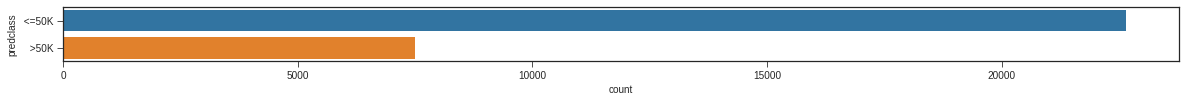

In [ ]:
#check pred class
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

In [ ]:
#Education feature
my_df['Education'].replace(' Preschool', 'dropout',inplace=True)
my_df['Education'].replace(' 10th', 'dropout',inplace=True)
my_df['Education'].replace(' 11th', 'dropout',inplace=True)
my_df['Education'].replace(' 12th', 'dropout',inplace=True)
my_df['Education'].replace(' 1st-4th', 'dropout',inplace=True)
my_df['Education'].replace(' 5th-6th', 'dropout',inplace=True)
my_df['Education'].replace(' 7th-8th', 'dropout',inplace=True)
my_df['Education'].replace(' 9th', 'dropout',inplace=True)
my_df['Education'].replace(' HS-Grad', 'HighGrad',inplace=True)
my_df['Education'].replace(' HS-grad', 'HighGrad',inplace=True)
my_df['Education'].replace(' Some-college', 'CommunityCollege',inplace=True)
my_df['Education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['Education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
my_df['Education'].replace(' Bachelors', 'Bachelors',inplace=True)
my_df['Education'].replace(' Masters', 'Masters',inplace=True)
my_df['Education'].replace(' Prof-school', 'Masters',inplace=True)
my_df['Education'].replace(' Doctorate', 'Doctorate',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


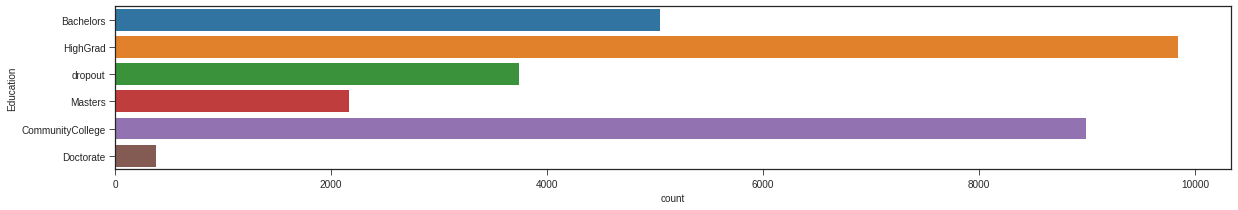

In [ ]:
#education feature distribution
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="Education", data=my_df)

In [ ]:
#marital_Status feature
my_df['Marital_Status'].replace(' Never-married', 'NotMarried',inplace=True)
my_df['Marital_Status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
my_df['Marital_Status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
my_df['Marital_Status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['Marital_Status'].replace([' Separated'], 'Separated',inplace=True)
my_df['Marital_Status'].replace([' Divorced'], 'Separated',inplace=True)
my_df['Marital_Status'].replace([' Widowed'], 'Widowed',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


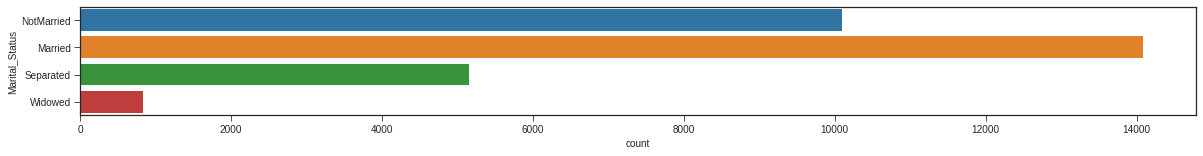

In [ ]:
#marital_Status distribution
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="Marital_Status", data=my_df)

In [ ]:
# make the age variable discretized
my_df['age_bin'] = pd.cut(my_df['Age'], 20)



<ipython-input-20-5c5d24daa4bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['age_bin'] = pd.cut(my_df['Age'], 20)


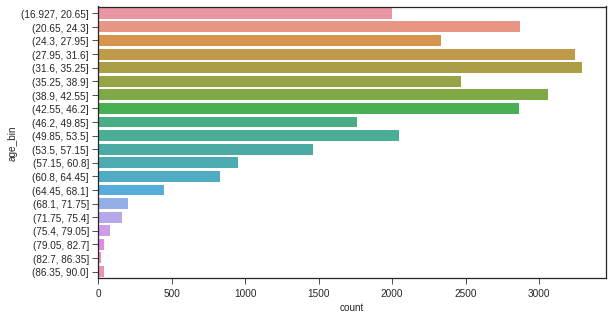

In [ ]:
#aga_bin feature distribution
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=my_df)

In [ ]:
#make hours-per-week feature discretized
my_df['hours-per-week_bin'] = pd.cut(my_df['Hours-Per-Week'], 10)


<ipython-input-22-3aa38c108735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['hours-per-week_bin'] = pd.cut(my_df['Hours-Per-Week'], 10)


In [ ]:
my_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,predclass,age_bin,hours-per-week_bin
0,39.0,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K,"(38.9, 42.55]","(30.4, 40.2]"
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,"(49.85, 53.5]","(10.8, 20.6]"
2,38.0,Private,215646,HighGrad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"
3,53.0,Private,234721,dropout,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,"(49.85, 53.5]","(30.4, 40.2]"
4,28.0,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,"(27.95, 31.6]","(30.4, 40.2]"


In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV

# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder


#PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


#importing all the required ML packages
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [ ]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()



,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,predclass,age_bin,hours-per-week_bin
0,22,5,2491,0,12,1,0,1,4,1,24,0,39,38,0,6,3
1,33,4,2727,0,12,0,3,0,4,1,0,0,12,38,0,9,1
2,21,2,13188,3,8,2,5,1,4,1,0,0,39,38,0,5,3
3,36,2,14354,5,6,0,5,0,2,1,0,0,39,38,0,9,3
4,11,2,18120,0,12,0,9,5,2,0,0,0,39,4,0,3,3


In [ ]:
#Features and target split
drop_elements = ['Education', 'Native_Country', 'predclass', 'age_bin','hours-per-week_bin']
y_train = my_df["predclass"]
X_train = my_df.drop(drop_elements, axis=1)
X_train.head()

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week
0,22,5,2491,12,1,0,1,4,1,24,0,39
1,33,4,2727,12,0,3,0,4,1,0,0,12
2,21,2,13188,8,2,5,1,4,1,0,0,39
3,36,2,14354,6,0,5,0,2,1,0,0,39
4,11,2,18120,12,0,9,5,2,0,0,0,39


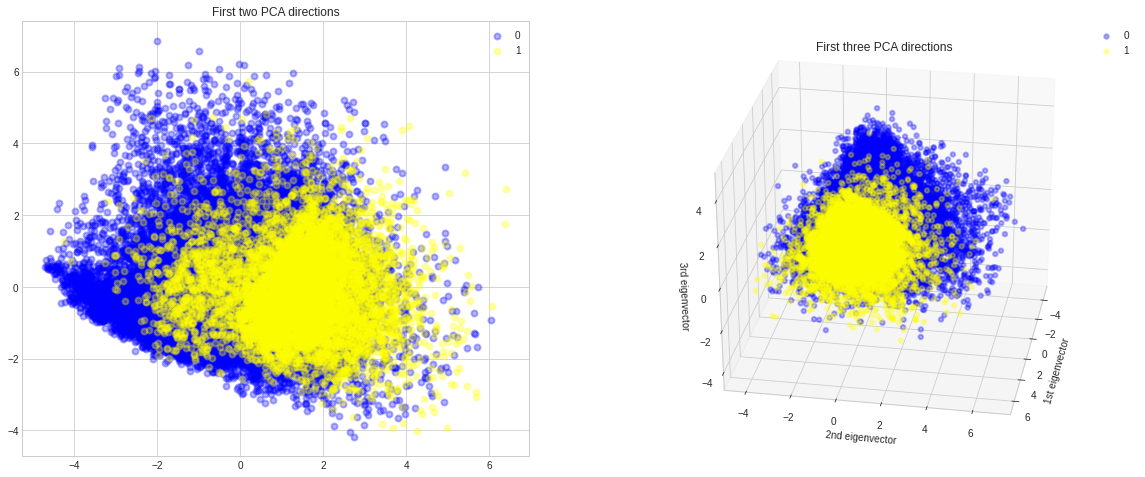

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling
std_scale = preprocessing.StandardScaler().fit(my_df.drop('predclass', axis=1))
X = std_scale.transform(my_df.drop('predclass', axis=1))
y = my_df['predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color,
                alpha=alpha,
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
               color=color,
               alpha=alpha,
               lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [ ]:
#normalize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
x_train_pca

array([[-0.94248232,  1.50358726],
       [-1.02623129,  0.44710715],
       [ 0.36755766, -0.59148703],
       ...,
       [ 2.760877  ,  1.38697629],
       [ 1.37375774, -1.52728991],
       [ 0.60649692,  2.13929978]])

In [ ]:
test_df.replace('?' ,np.NaN ,inplace=True)
test_df.replace('? ' ,np.NaN ,inplace=True)
test_df.replace(' ?' ,np.NaN ,inplace=True)

In [ ]:
test_df.Age = test_df.Age.astype(float)
test_df['Hours-Per-Week'] = test_df['Hours-Per-Week'].astype(float)

In [ ]:
test_data = test_df.dropna()

In [ ]:
test_data['predclass'] = test_data['Income']
del test_data['Income']


<ipython-input-32-47a4ac1e7a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predclass'] = test_data['Income']


In [ ]:
#Education feature
test_data['Education'].replace(' Preschool', 'dropout',inplace=True)
test_data['Education'].replace(' 10th', 'dropout',inplace=True)
test_data['Education'].replace(' 11th', 'dropout',inplace=True)
test_data['Education'].replace(' 12th', 'dropout',inplace=True)
test_data['Education'].replace(' 1st-4th', 'dropout',inplace=True)
test_data['Education'].replace(' 5th-6th', 'dropout',inplace=True)
test_data['Education'].replace(' 7th-8th', 'dropout',inplace=True)
test_data['Education'].replace(' 9th', 'dropout',inplace=True)
test_data['Education'].replace(' HS-Grad', 'HighGrad',inplace=True)
test_data['Education'].replace(' HS-grad', 'HighGrad',inplace=True)
test_data['Education'].replace(' Some-college', 'CommunityCollege',inplace=True)
test_data['Education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
test_data['Education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
test_data['Education'].replace(' Bachelors', 'Bachelors',inplace=True)
test_data['Education'].replace(' Masters', 'Masters',inplace=True)
test_data['Education'].replace(' Prof-school', 'Masters',inplace=True)
test_data['Education'].replace(' Doctorate', 'Doctorate',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#marital_Status feature
test_data['Marital_Status'].replace(' Never-married', 'NotMarried',inplace=True)
test_data['Marital_Status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
test_data['Marital_Status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
test_data['Marital_Status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
test_data['Marital_Status'].replace([' Separated'], 'Separated',inplace=True)
test_data['Marital_Status'].replace([' Divorced'], 'Separated',inplace=True)
test_data['Marital_Status'].replace([' Widowed'], 'Widowed',inplace=True)

In [ ]:
# make the age variable discretized
test_data['age_bin'] = pd.cut(test_data['Age'], 20)


<ipython-input-35-3aad8f7babd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['age_bin'] = pd.cut(test_data['Age'], 20)


In [ ]:
#make hours-per-week feature discretized
test_data['hours-per-week_bin'] = pd.cut(test_data['Hours-Per-Week'], 10)


<ipython-input-36-714a9719afb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['hours-per-week_bin'] = pd.cut(test_data['Hours-Per-Week'], 10)


In [ ]:
test_data.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,predclass,age_bin,hours-per-week_bin
0,25.0,Private,226802,dropout,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K.,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,89814,HighGrad,9,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K.,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,336951,CommunityCollege,12,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K.,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,160323,CommunityCollege,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K.,"(42.55, 46.2]","(30.4, 40.2]"
5,34.0,Private,198693,dropout,6,NotMarried,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K.,"(31.6, 35.25]","(20.6, 30.4]"


In [ ]:
test_data = test_data.apply(LabelEncoder().fit_transform)


In [ ]:
test_data.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,predclass,age_bin,hours-per-week_bin
0,8,2,8315,5,6,1,6,3,2,1,0,0,39,37,0,2,3
1,21,2,1754,3,8,0,4,0,4,1,0,0,49,37,0,5,4
2,11,1,10750,1,11,0,10,0,4,1,0,0,39,37,1,3,3
3,27,2,4780,1,9,0,6,0,2,1,87,0,39,37,1,7,3
5,17,2,7091,5,5,1,7,1,4,1,0,0,29,37,0,4,2


In [ ]:
#Features and target split
drop_elements = ['Education', 'Native_Country', 'predclass', 'age_bin','hours-per-week_bin']
y_test = test_data["predclass"]
X_test = test_data.drop(drop_elements, axis=1)
X_test.head()

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week
0,8,2,8315,6,1,6,3,2,1,0,0,39
1,21,2,1754,8,0,4,0,4,1,0,0,49
2,11,1,10750,11,0,10,0,4,1,0,0,39
3,27,2,4780,9,0,6,0,2,1,87,0,39
5,17,2,7091,5,1,7,1,4,1,0,0,29


In [ ]:
#normalize the data
sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(X_test_std)
b = pca.explained_variance_ratio_
b_running = b.cumsum()
b_running

array([0.18987432, 0.29167372])

In [ ]:
#Naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


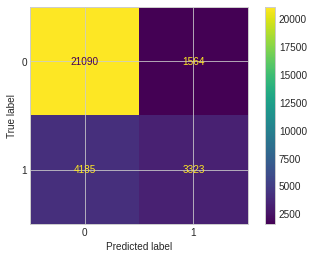

In [ ]:
#naive bayes model confusion matrix on train
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(gnb,X_train ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


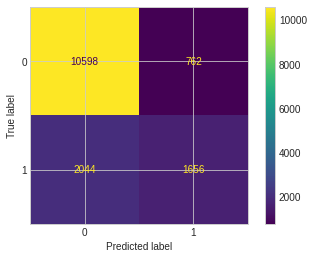

In [ ]:
#naive bayes confusion matrix on test
plot_confusion_matrix(gnb,X_test ,y_test ,values_format='d')

In [ ]:
#naive bayes classifiction report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.45      0.54      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.71     15060
weighted avg       0.80      0.81      0.80     15060



In [ ]:
#naive bayes model with pca
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)

GaussianNB()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


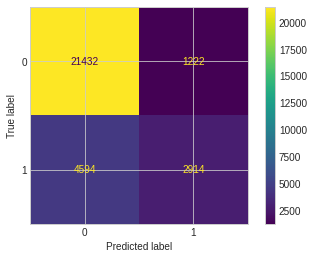

In [ ]:
#confusion matrix for train data with pca
plot_confusion_matrix(gnb,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


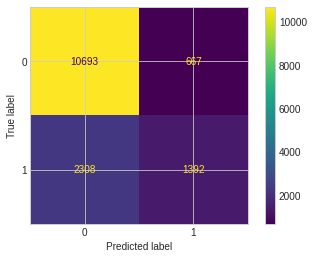

In [ ]:
#confusion matrix for test data with pca
plot_confusion_matrix(gnb,x_test_pca ,y_test ,values_format='d')

In [ ]:
#classification report for naive with pca
print(classification_report(y_test, gnb.predict(x_test_pca)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     11360
           1       0.68      0.38      0.48      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.66      0.68     15060
weighted avg       0.79      0.80      0.78     15060



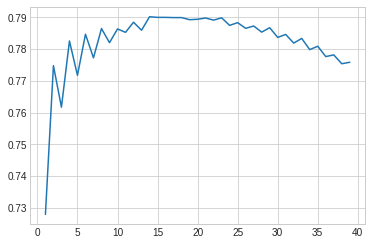

In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
score_list2=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))
plt.plot(range(1,40),score_list)
plt.show()

In [ ]:
#knn model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
# print classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87     11360
           1       0.71      0.24      0.36      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.61      0.62     15060
weighted avg       0.78      0.79      0.75     15060



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


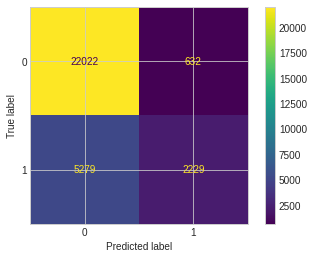

In [ ]:
#knn model confusion matrix for train data
plot_confusion_matrix(knn,X_train ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


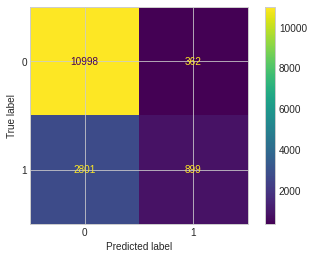

In [ ]:
#knn model confusion matrix for test data
plot_confusion_matrix(knn,X_test ,y_test ,values_format='d')

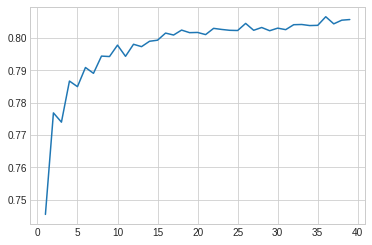

In [ ]:
#KNN model with pca
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
score_list2=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca,y_train)
    score_list.append(knn.score(x_test_pca,y_test))
plt.plot(range(1,40),score_list)
plt.show()

In [ ]:
#knn model with pca
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(x_train_pca,y_train)
# print classification report
print(classification_report(y_test, knn.predict(x_test_pca)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11360
           1       0.65      0.46      0.54      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.69      0.71     15060
weighted avg       0.79      0.81      0.79     15060



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


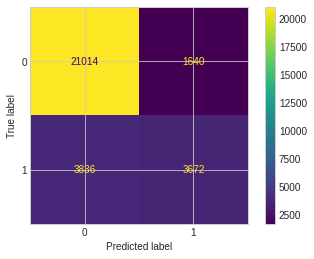

In [ ]:
#knn model with pca confusion matrix for train
plot_confusion_matrix(knn,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


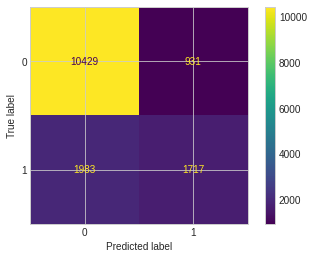

In [ ]:
#knn model with pca confusion matrix for test
plot_confusion_matrix(knn,x_test_pca ,y_test ,values_format='d')

In [ ]:
#SVM model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train[0:2000],y_train[0:2000])

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma = 0.0001)
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.0001)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


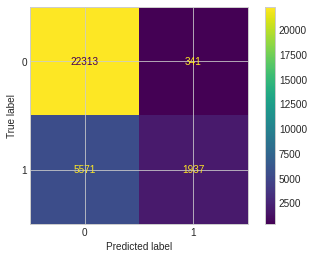

In [ ]:
plot_confusion_matrix(svm_model,X_train ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


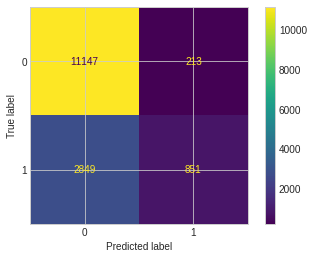

In [ ]:
plot_confusion_matrix(svm_model,X_test ,y_test ,values_format='d')

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86     11360
           1       0.66      0.09      0.16      3700

    accuracy                           0.77     15060
   macro avg       0.72      0.54      0.51     15060
weighted avg       0.74      0.77      0.69     15060



In [ ]:
# SVM model with pca
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train_pca[0:2000],y_train[0:2000])

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


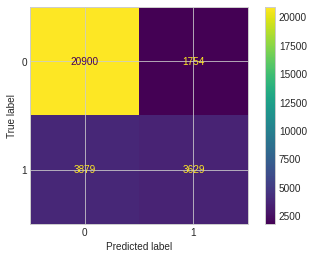

In [ ]:
plot_confusion_matrix(svm_model,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


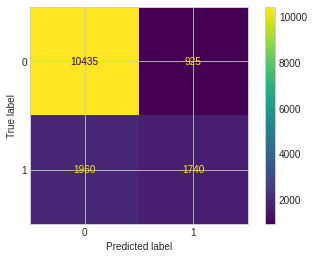

In [ ]:
plot_confusion_matrix(svm_model,x_test_pca ,y_test ,values_format='d')

In [ ]:
grid_predictions = grid.predict(x_test_pca)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11360
           1       0.66      0.44      0.53      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.68      0.70     15060
weighted avg       0.79      0.81      0.79     15060



In [ ]:
#visualizing knn , svm models
from mlxtend.plotting import plot_decision_regions
svm_model = SVC(kernel='rbf', C=1, gamma = 1, probability=True)
svm_model.fit(x_train_pca, y_train)

SVC(C=1, gamma=1, probability=True)

In [ ]:
y_train = np.asarray(y_train)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


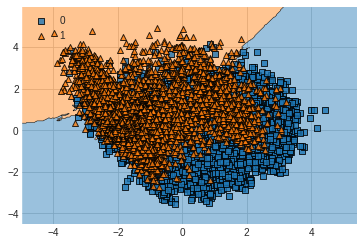

In [ ]:
plot_decision_regions(x_train_pca, y_train, clf=knn, legend=2)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


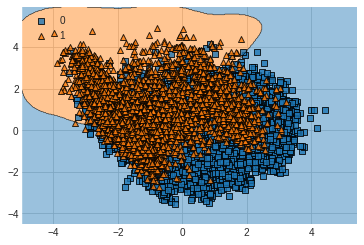

In [ ]:
plot_decision_regions(x_train_pca, y_train, clf=svm_model, legend=2)

In [ ]:
#soft voting
from sklearn.ensemble import VotingClassifier
models = [('Knn',knn),('svm',svm_model),('gnb',gnb)]
ensemble = VotingClassifier(estimators=models, voting='soft')

In [ ]:
ensemble.fit(x_train_pca,y_train)

VotingClassifier(estimators=[('Knn', KNeighborsClassifier(n_neighbors=36)),
                             ('svm', SVC(C=1, gamma=1, probability=True)),
                             ('gnb', GaussianNB())],
                 voting='soft')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


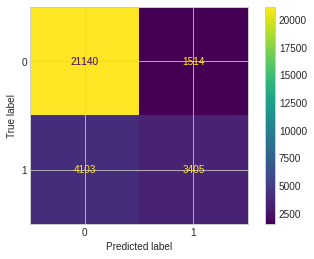

In [ ]:
#soft voting
plot_confusion_matrix(ensemble,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


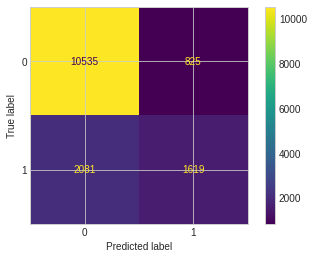

In [ ]:
#soft voting
plot_confusion_matrix(ensemble,x_test_pca ,y_test ,values_format='d')

In [ ]:
#soft voting
predictions = ensemble.predict(x_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.66      0.44      0.53      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.68      0.70     15060
weighted avg       0.79      0.81      0.79     15060



In [ ]:
#hard voting
ensemble = VotingClassifier(estimators=models, voting='hard')

In [ ]:
ensemble.fit(x_train_pca,y_train)

VotingClassifier(estimators=[('Knn', KNeighborsClassifier(n_neighbors=36)),
                             ('svm', SVC(C=1, gamma=1, probability=True)),
                             ('gnb', GaussianNB())])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


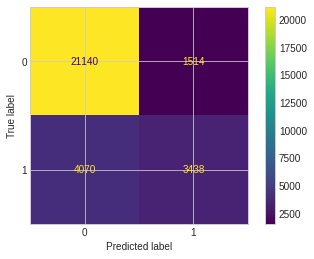

In [ ]:
#hard voting
plot_confusion_matrix(ensemble,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


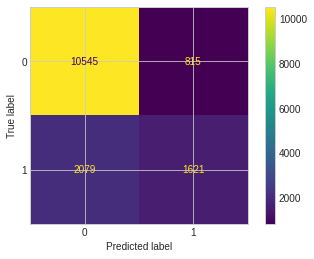

In [ ]:
#hard voting
plot_confusion_matrix(ensemble,x_test_pca ,y_test ,values_format='d')

In [ ]:
#hard voting
predictions = ensemble.predict(x_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.67      0.44      0.53      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.68      0.70     15060
weighted avg       0.79      0.81      0.79     15060



In [ ]:
!pip install deslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#KNORA-U
from deslib.des.knora_u import KNORAU
model = KNORAU()
model.fit(x_train_pca, y_train)

KNORAU()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


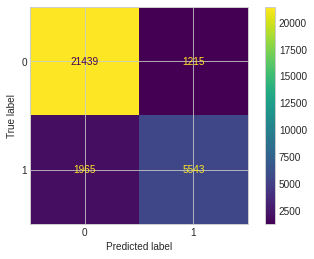

In [ ]:
#KNORA-U
plot_confusion_matrix(model,x_train_pca ,y_train ,values_format='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


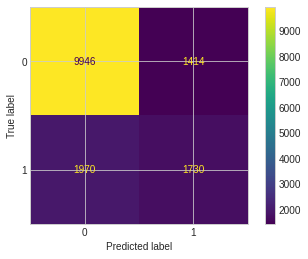

In [ ]:
#KNORA-U
plot_confusion_matrix(model,x_test_pca ,y_test ,values_format='d')

In [ ]:
prediction = model.predict(x_test_pca)

In [ ]:
#KNORA-U
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.67      0.44      0.53      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.68      0.70     15060
weighted avg       0.79      0.81      0.79     15060

